# Animal Classifier Predictions

Make predictions on a trained animal classifier model

In [108]:
import os
import pathlib
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL

Load a trained image classifying model:

In [109]:
model = tf.keras.models.load_model('saved_models/cnn_model.h5')

Model summary:

In [110]:
model.summary()

Model: "cnn_model_one"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 224, 224, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 224, 224, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 64)      

Load class_names.json containing animal class names

In [111]:
import json

f = open('class_names.json')
data = json.load(f)

class_names = data["class_names"]
no_of_classes = data["no_of_classes"]

Load the image from a local directory:

In [112]:
image_url = r"C:\Users\Purav Parab\Documents\ML\projects\animal_classifier\examples\default_cat.png"

Display image:

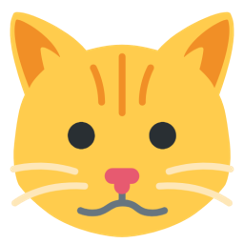

In [113]:
PIL.Image.open(image_url)

Specify image width and height:

In [114]:
image_width = 224
image_height = 224

Modify image to be analysed by the model

In [115]:
img = tf.keras.utils.load_img(
    image_url, target_size=(image_width, image_height)
)
img_array = tf.keras.utils.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) # Create a batch

# Image Prediction
Make a prediction with the trained model

In [116]:
predictions = model.predict(img_array)
score = tf.nn.softmax(predictions[0])

1/1 [==============================] - 0s 129ms/step


Model prediction:

In [117]:
prediction_index = np.argmax(score)
print(prediction_index)
if tf.get_static_value(score[prediction_index]) * 100 > 90:
    key = list(class_names[prediction_index].keys())[0]
    value = class_names[prediction_index][key]
    print(
        "This image most likely belongs to {} ({}) with a {:.2f}% confidence. \n"
        .format(value, key, 100 * tf.get_static_value(score[prediction_index]))
    )
else:
    count = 1
    print("This image could be: \n")
    for i in range(len(score)):
        if tf.get_static_value(score[i]) * 100 > 1:
            key = list(class_names[i].keys())[0]
            value = class_names[i][key]
            print(f'{count} - {value} ({key}) : {tf.get_static_value(score[i]) * 100}%')
            count = count + 1

60
This image most likely belongs to Cat (felis-catus) with a 100.00% confidence. 

